In [1]:
import numpy as np
import pandas as pd
import struct
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
sns.set_style('darkgrid')
import sys
import os
import seaborn
from  matplotlib import pyplot

In [2]:
def read_file(file_name):
    array = np.loadtxt(file_name)
    data = list(zip(*array))
    return data

def plot_multiple(data, data_name, data_xlabel, data_ylabel, legend_names): # plot several results together
    fig, axes = plt.subplots(nrows = 1, ncols = 1, sharey = True, figsize=(10,7))
    m = []
    axes.set_title(data_name)
    axes.set_xlabel(data_xlabel)
    axes.set_ylabel(data_ylabel)
    for j in range(len(data)):
        m1 = axes.errorbar(data[j][0], data[j][1], yerr = data[j][2])
        m.append(m1)
    axes.legend(m, legend_names)
    plt.show()
    plt.clf()
    
def get_potential(data_path, T1):
    T = T1 - 1
    x = []
    y = []
    y_err = []
    for i in range(1, 17):
        data= read_file(data_path + '%d' % (i))
        y.append(math.log(data[1][T]/data[1][T+1]))
        y_err.append(math.sqrt( (data[2][T]/data[1][T])*(data[2][T]/data[1][T]) + (data[2][T+1]/data[1][T+1])*(data[2][T+1]/data[1][T+1])) )
        x.append(i)
    return x, y, y_err

def merge(data1, data2):
    data = []
    x = []
    y = []
    y_err = []
    for i in range(len(data1[1])):
        x.append(data1[0][i])
        y.append(data1[1][i] + data2[1][i])
        y_err.append(data1[2][i] + data2[2][i])
    return x, y, y_err
    
def potential_plot_multiple(T, mu):
    data = []
    w=mu//10
    q=mu-w*10
    data.append(get_potential('/home/ilya/lattice/observables/data/wilson_loop/mon_wl/mu0.%d%d/potential_R=' % (w, q), T))
    data.append(get_potential('/home/ilya/lattice/observables/data/wilson_loop/offd/HYP_APE/mu0.%d%d/potential_R=' % (w, q), T))
    data.append(get_potential('/home/ilya/lattice/observables/data/wilson_loop/mag/HYP_APE/mu0.%d%d/potential_R=' % (w, q), T))
    data.append(merge(data[0], data[1]))
    #print(data[1], data[2], data[3])
    plot_multiple(data, 'potential', 'R', 'V(R)', ['mon_wl', 'offd', 'mag', 'mon_wl + offd'])
    plt.show()
    plt.clf()
    
def potential_plot(N): #build plot for longitudinal
    T = N - 6
    x = []
    y = []
    y_err = []
    for i in range(1, 21):
        data= read_file('/home/ilya/lattice/observables/data/wilson_loop/qc2dstag/HYP_APE/mu0.05/potential_R=%d' % (i))
        #print(i, data[1][T]/data[1][T+1])
        y.append(math.log(data[1][T]/data[1][T+1]))
        #y.append(data[1][T])
        #y_err.append(data[2][T])
        y_err.append(math.sqrt( (data[2][T]/data[1][T])*(data[2][T]/data[1][T]) + (data[2][T+1]/data[1][T+1])*(data[2][T+1]/data[1][T+1])) )
        x.append(i)
    plt.errorbar(x, y, yerr=y_err)
    plt.show()
    plt.clf()
    
def potential_time(R):
    x = []
    y = []
    y_err = []
    for T in range(10):
        data= read_file('/home/ilya/lattice/observables/data/wilson_loop/su2/APE/mu0.00/potential_R=%d' % (R))
        #print(T, data[1][T]/data[1][T+1])
        y.append(log(data[1][T]/data[1][T+1]))
        #y.append(data[1][T])
        y_err.append(math.sqrt( (data[2][T]/data[1][T])*(data[2][T]/data[1][T]) + (data[2][T+1]/data[1][T+1])*(data[2][T+1]/data[1][T+1])))
        x.append(T+6)
    plt.errorbar(x, y, yerr=y_err)
    plt.show()
    plt.clf()

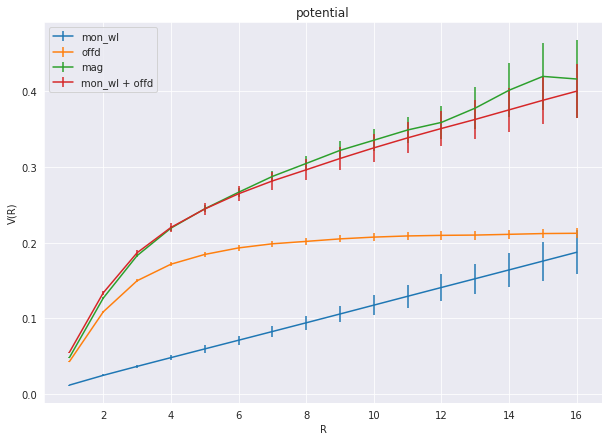

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [3]:
potential_plot_multiple(10, 0)

In [3]:
def plot_potential_df_space(data):
    print('T =', data['T'].iloc[0])
    data.plot(x = 'r/a', y = 'aV(r)', yerr = 'err', style='.')
    plt.show()
    
def plot_potential_df_space1(data):
    print('r1/a =', data['r1/a'].iloc[0])
    data.plot(x = 'r2/a', y = 'aV(r)', yerr = 'err', style='.')
    plt.show()
    
def plot_potential_df_time(data):
    print('r/a =', data['r/a'].iloc[0])
    data.plot(x = 'T', y = 'aV(r)', yerr = 'err', style='.')
    plt.show()
    
def plot_potential_df_space_together(data):
    print('T =', data['T'].iloc[0])
    data.plot(x = 'r/a', y = 'aV(r)', yerr = 'err', style='.')
    
def plot_potential_df_space_several(data, image_path, image_name):
    print('T =', data['T'].iloc[0])
    ax = data[data['type'] == "monopole"].plot(x = 'r/a', y = 'aV(r)', yerr = 'err', style='o-', linestyle='None', kind = 'scatter', color='green')
    data[data['type'] == "monopoless"].plot(x = 'r/a', y = 'aV(r)', yerr = 'err', style='o-', linestyle='None', kind = 'scatter', color='red', ax = ax)
    data[data['type'] == "full"].plot(x = 'r/a', y = 'aV(r)', yerr = 'err', style='o-', linestyle='None', kind = 'scatter', color='blue', ax = ax)
    data[data['type'] == "sum"].plot(x = 'r/a', y = 'aV(r)', yerr = 'err', style='o-', linestyle='None', kind = 'scatter', color='orange', ax = ax)
    ax.legend(["monopole", "monopoless", "full", "sum",]);
    
    try:
        os.makedirs(image_path)
    except:
        pass
    
    image_path = f"{image_path}/{image_name}_T={data['T'].iloc[0]}"
    
    plt.savefig(image_path, dpi=800)
    plt.show()

In [4]:
def plot_potential_test(data, time):
    x = data[data['time_size'] == time][['space_size']].to_numpy()
    y1 = data[data['time_size'] == time][['potential']].to_numpy()
    y2 = data[data['time_size'] == time + 1][['potential']].to_numpy()
    y = -np.log(y2/y1)
    x = np.transpose(x)
    y = np.transpose(y)
    plt.plot(x[0], y[0])
    plt.show()

time_size = 4


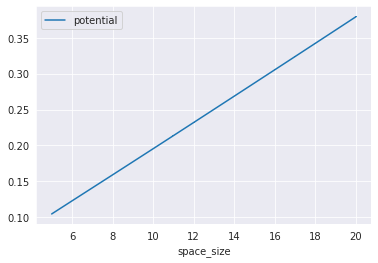

time_size = 5


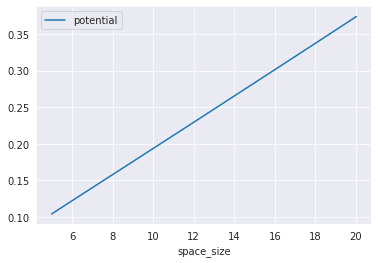

time_size = 6


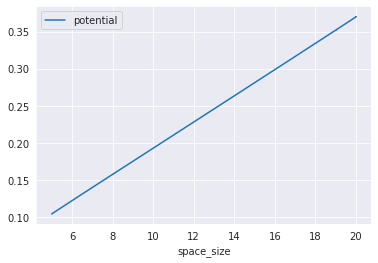

time_size = 7


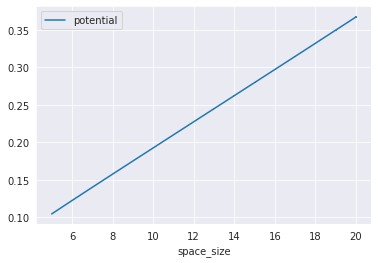

time_size = 8


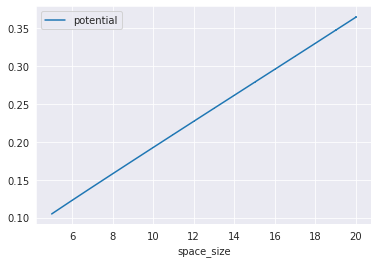

time_size = 9


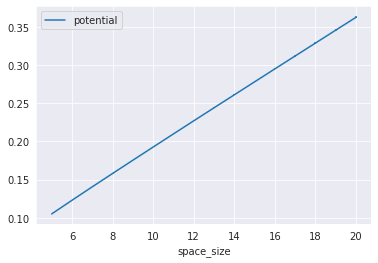

time_size = 10


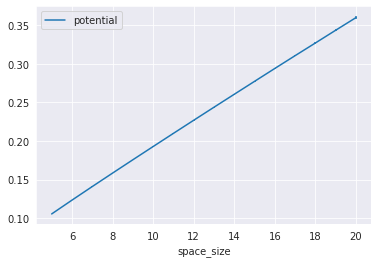

time_size = 11


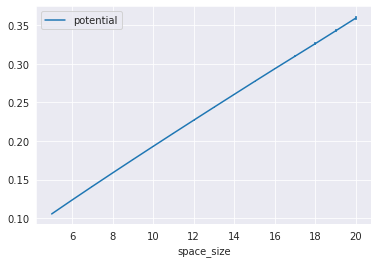

time_size = 12


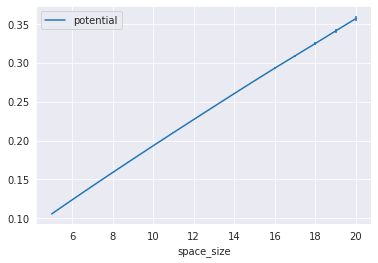

time_size = 13


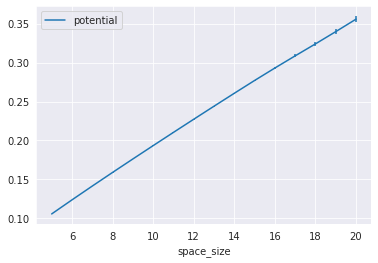

time_size = 14


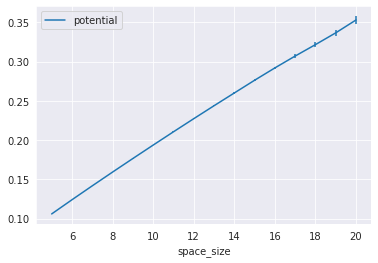

time_size = 15


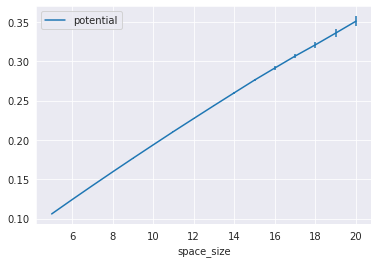

time_size = 16


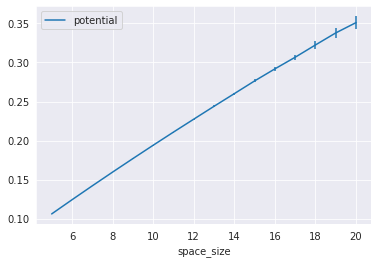

time_size = 17


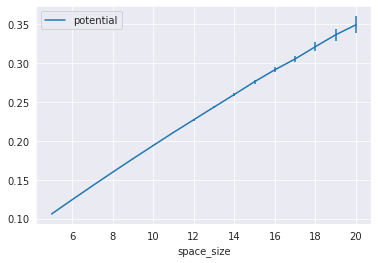

time_size = 18


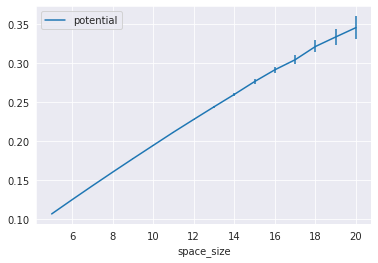

time_size = 19


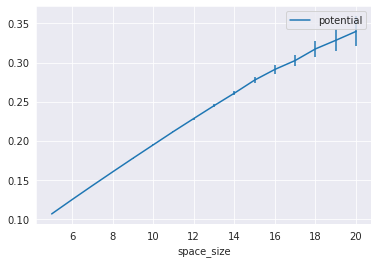

Empty DataFrame
Columns: []
Index: []

In [108]:
df_data_40_5 = pd.read_csv(f"../result/potential/on-axis/monopole/qc2dstag/40^4/unsmeared/potential_mu=0.05.csv", index_col=None)
df_data_40_5.groupby(['time_size']).apply(plot_potential_df_space)

time_size = 4


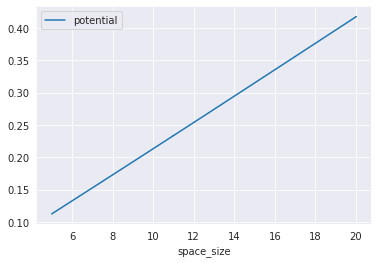

time_size = 5


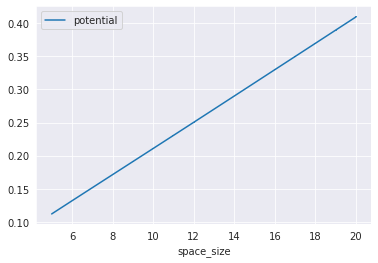

time_size = 6


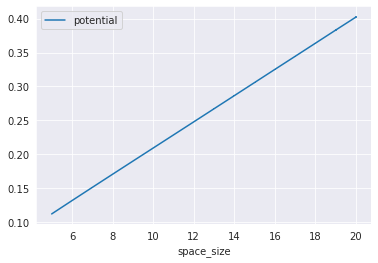

time_size = 7


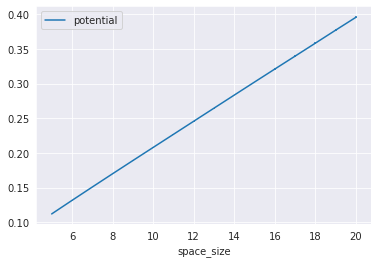

time_size = 8


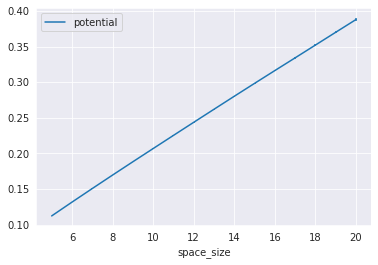

time_size = 9


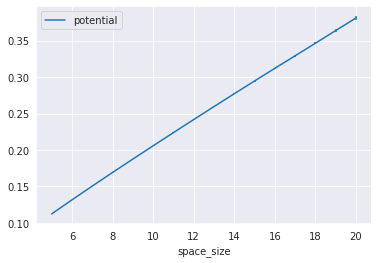

time_size = 10


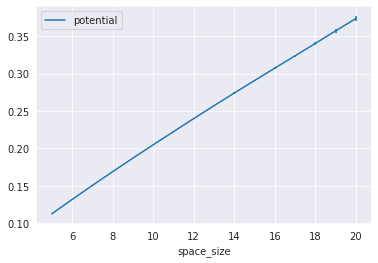

time_size = 11


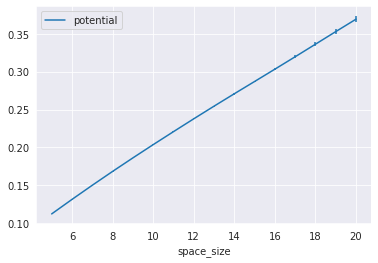

time_size = 12


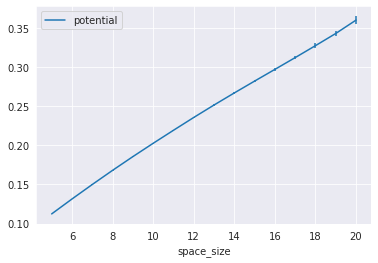

time_size = 13


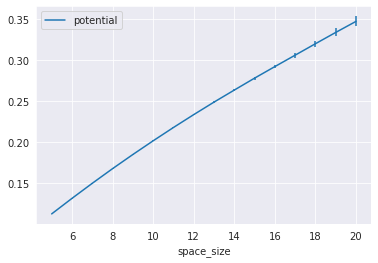

time_size = 14


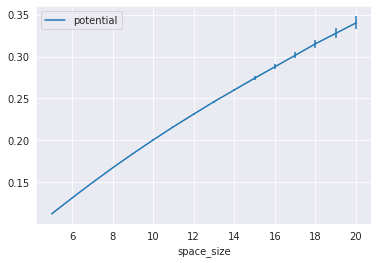

time_size = 15


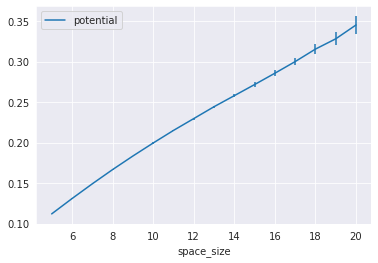

time_size = 16


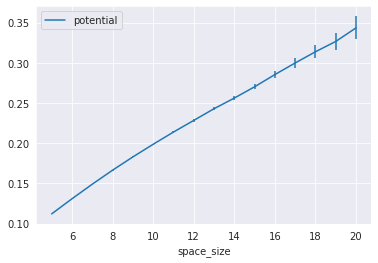

time_size = 17


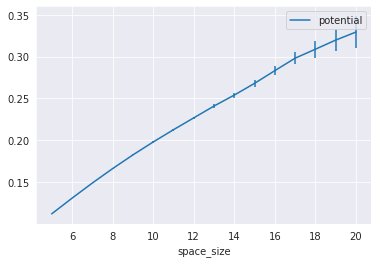

time_size = 18


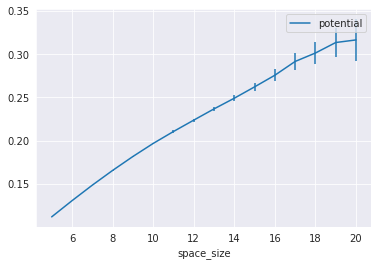

time_size = 19


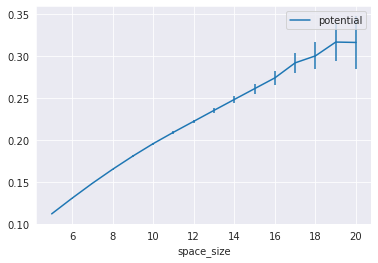

Empty DataFrame
Columns: []
Index: []

In [109]:
df_data_40_5 = pd.read_csv(f"../result/potential/on-axis/monopole/qc2dstag/40^4/unsmeared/potential_mu=0.35.csv", index_col=None)
df_data_40_5.groupby(['time_size']).apply(plot_potential_df_space)

time_size = 4


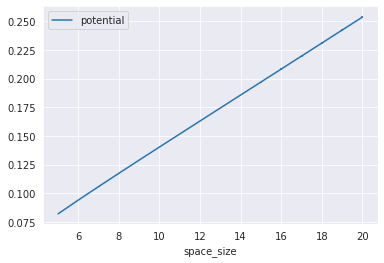

time_size = 5


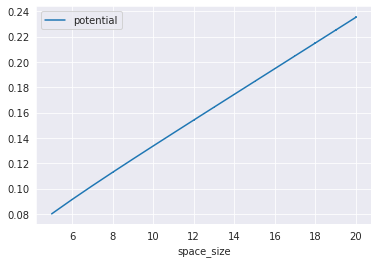

time_size = 6


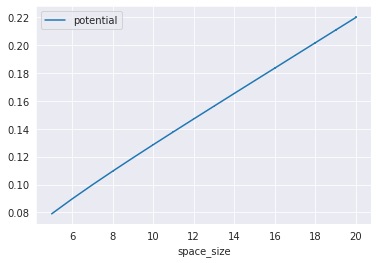

time_size = 7


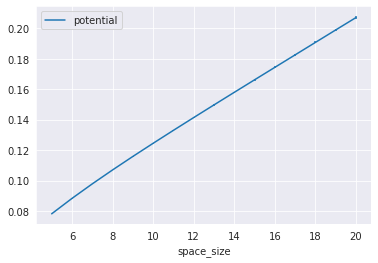

time_size = 8


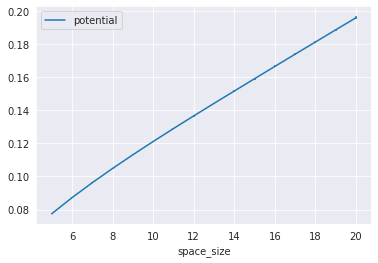

time_size = 9


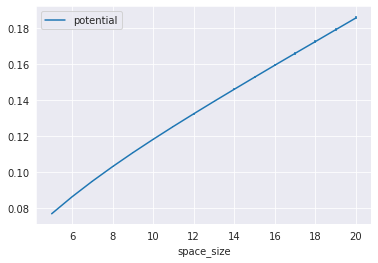

time_size = 10


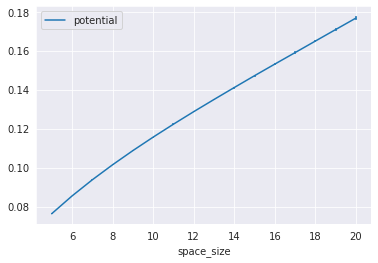

time_size = 11


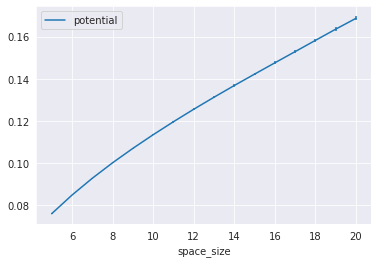

time_size = 12


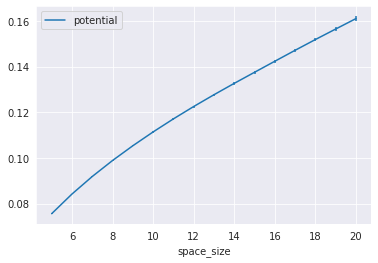

time_size = 13


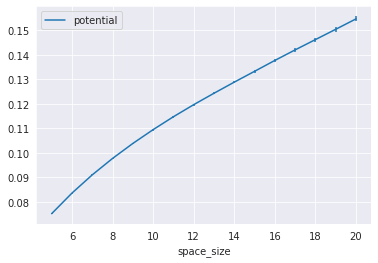

time_size = 14


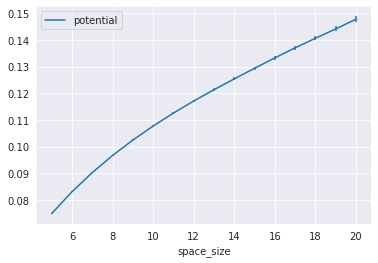

time_size = 15


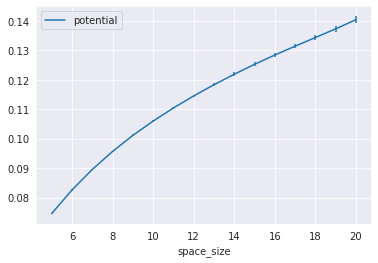

time_size = 16


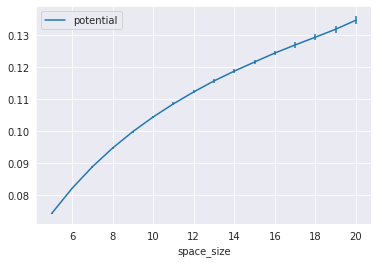

time_size = 17


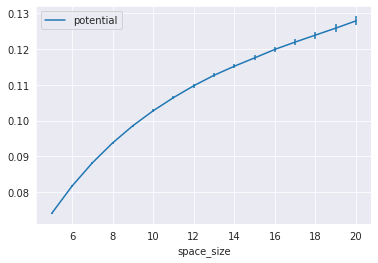

time_size = 18


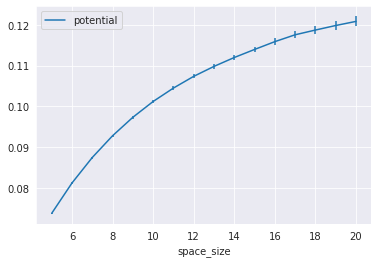

time_size = 19


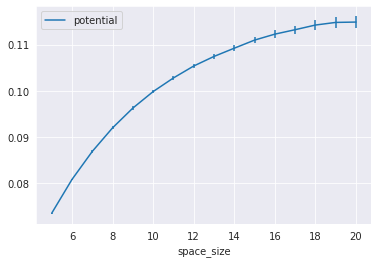

Empty DataFrame
Columns: []
Index: []

In [110]:
df_data_40_5 = pd.read_csv(f"../result/potential/on-axis/monopole/qc2dstag/40^4/unsmeared/potential_mu=0.45.csv", index_col=None)
df_data_40_5.groupby(['time_size']).apply(plot_potential_df_space)

time_size = 4


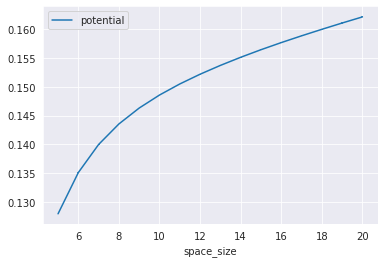

time_size = 5


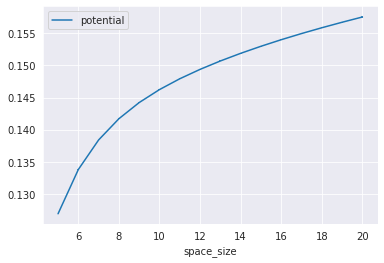

time_size = 6


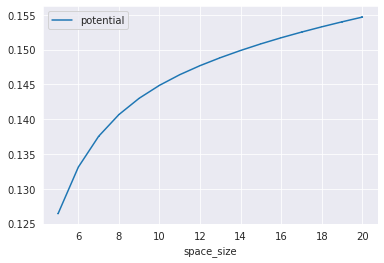

time_size = 7


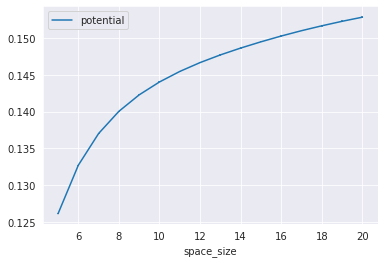

time_size = 8


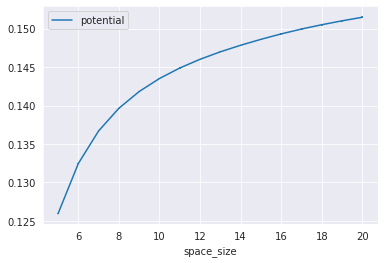

time_size = 9


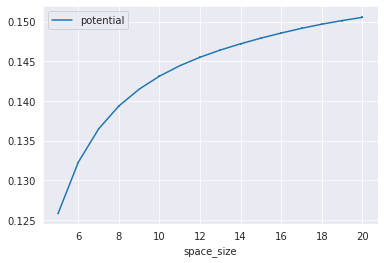

time_size = 10


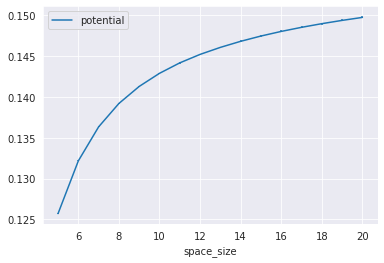

time_size = 11


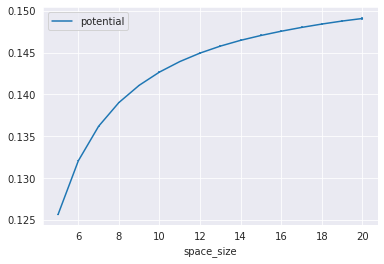

time_size = 12


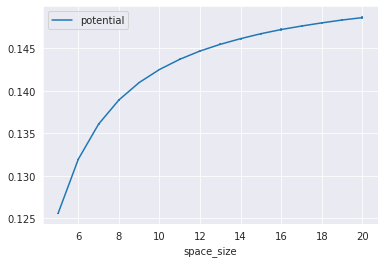

time_size = 13


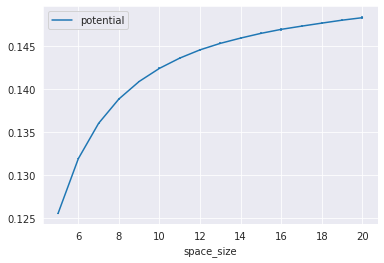

time_size = 14


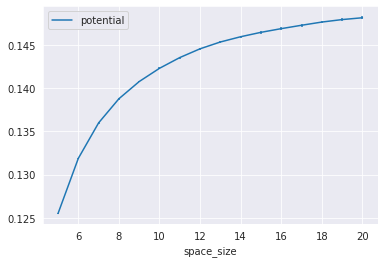

time_size = 15


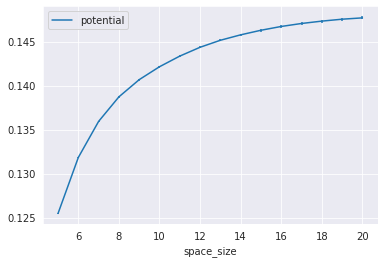

time_size = 16


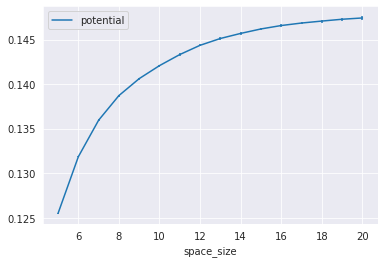

time_size = 17


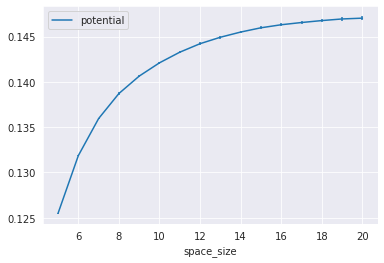

time_size = 18


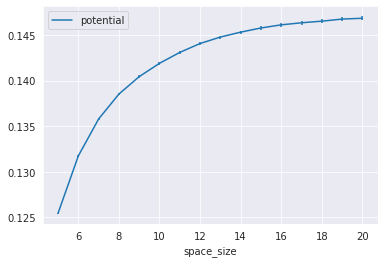

time_size = 19


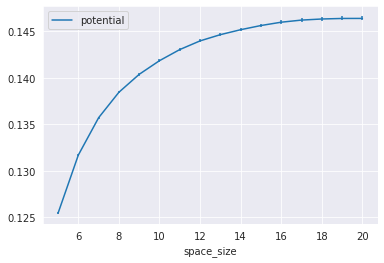

Empty DataFrame
Columns: []
Index: []

In [111]:
df_data_40_5 = pd.read_csv(f"../result/potential/on-axis/monopoless/qc2dstag/40^4/HYP2_APE/potential_mu=0.05.csv", index_col=None)
df_data_40_5.groupby(['time_size']).apply(plot_potential_df_space)

T = 4


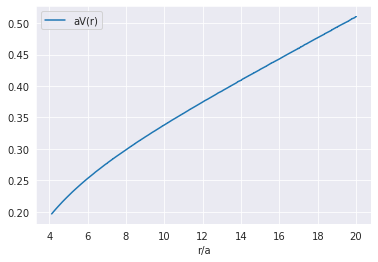

T = 5


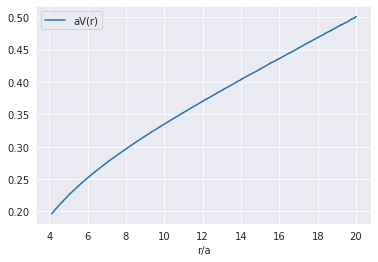

T = 6


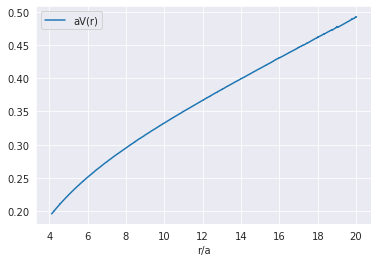

T = 7


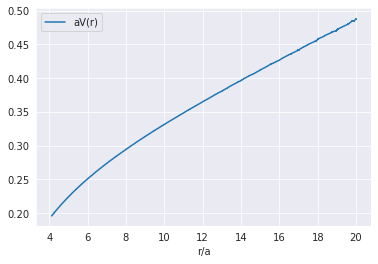

T = 8


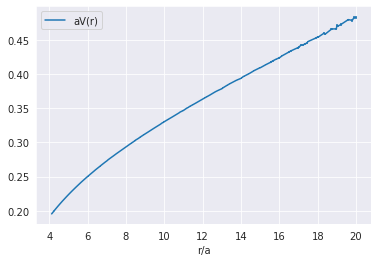

T = 9


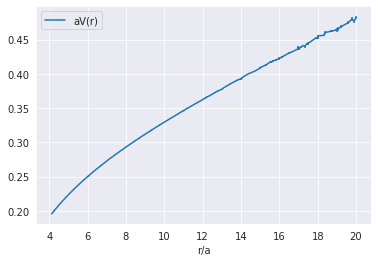

T = 10


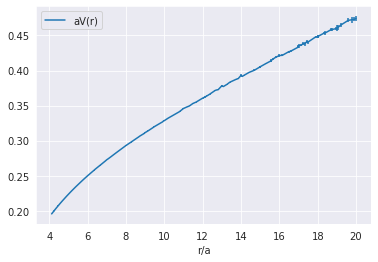

T = 11


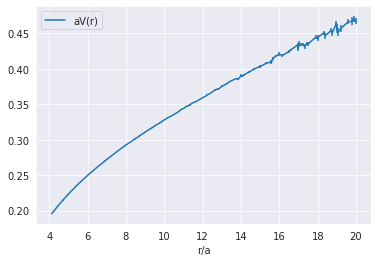

T = 12


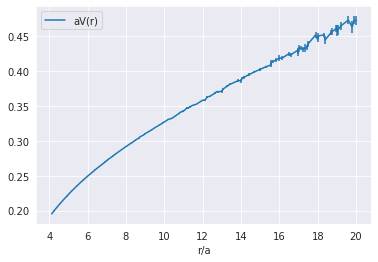

T = 13


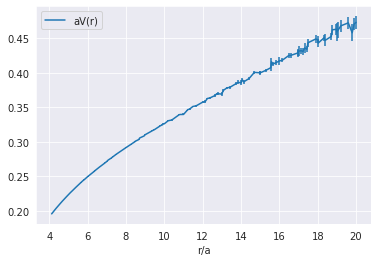

T = 14


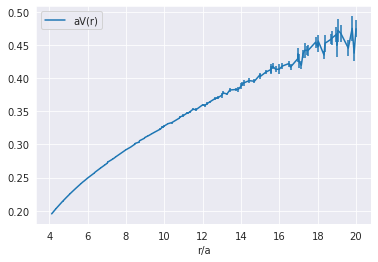

T = 15


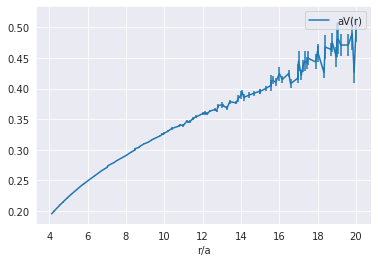

T = 16


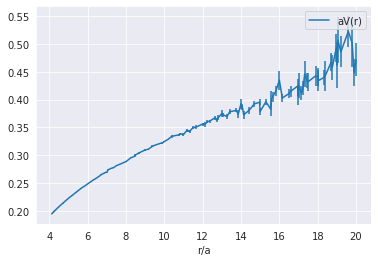

T = 17


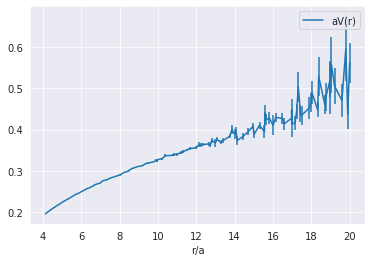

T = 18


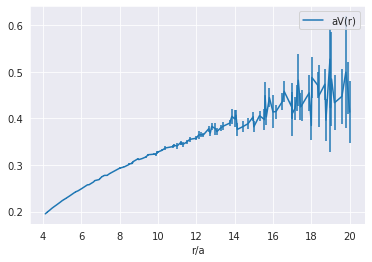

T = 19


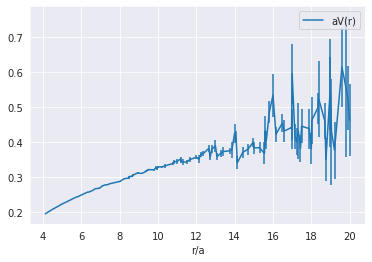

Empty DataFrame
Columns: []
Index: []

In [6]:
df_data_40_5 = pd.read_csv(f"../result/potential/off-axis/qc2dstag/40^4/potential_mu=0.05.csv", index_col=None)
df_data_40_5.groupby(['T']).apply(plot_potential_df_space)

time_size = 4


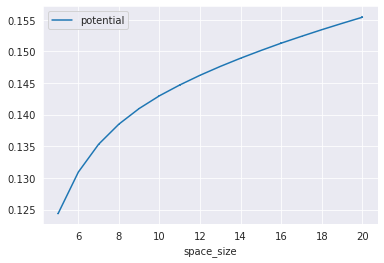

time_size = 5


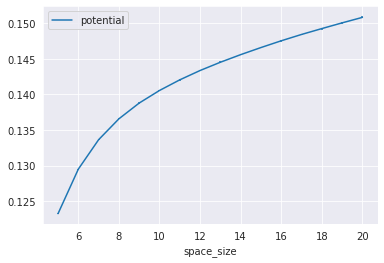

time_size = 6


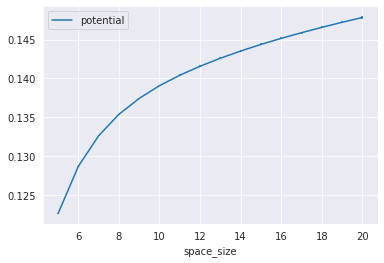

time_size = 7


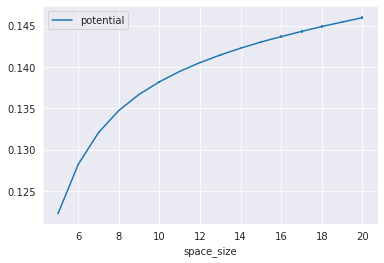

time_size = 8


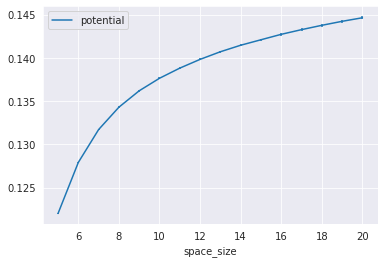

time_size = 9


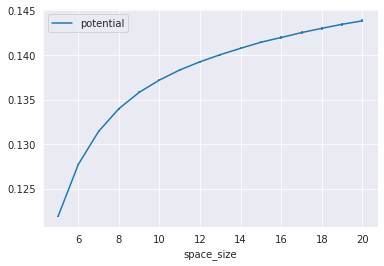

time_size = 10


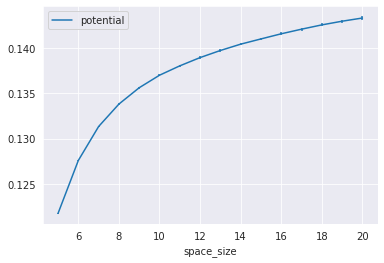

time_size = 11


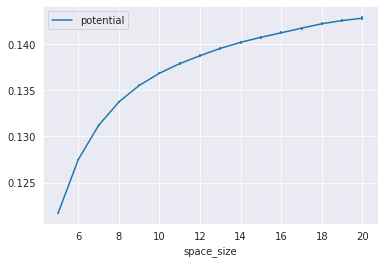

time_size = 12


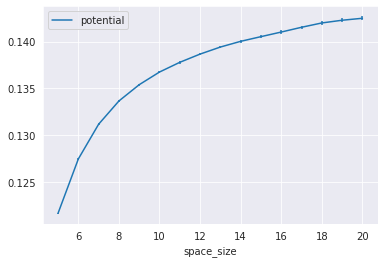

time_size = 13


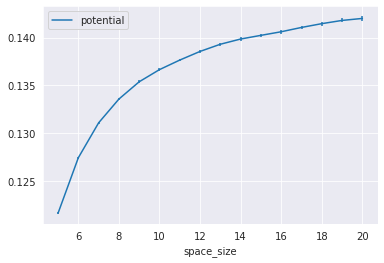

time_size = 14


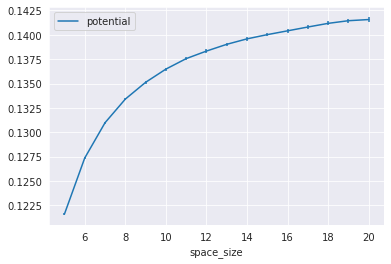

time_size = 15


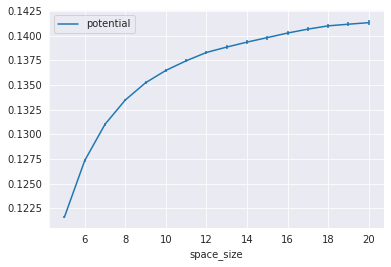

time_size = 16


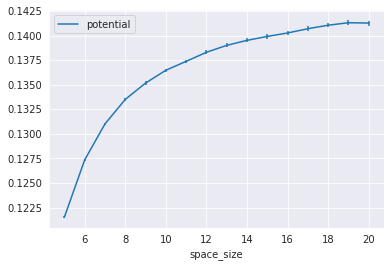

time_size = 17


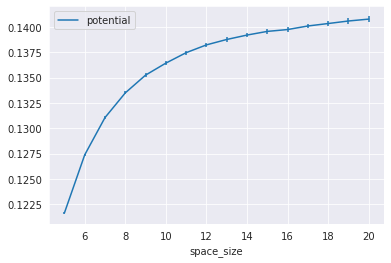

time_size = 18


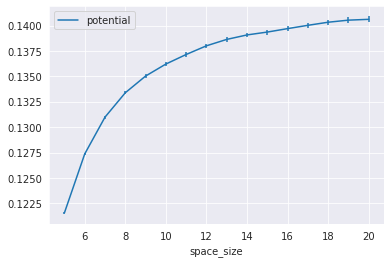

time_size = 19


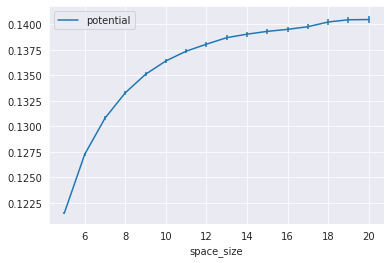

Empty DataFrame
Columns: []
Index: []

In [118]:
df_data_40_5 = pd.read_csv(f"../result/potential/on-axis/monopoless/qc2dstag/40^4/HYP2_APE/potential_mu=0.35.csv", index_col=None)
df_data_40_5.groupby(['time_size']).apply(plot_potential_df_space)

time_size = 4


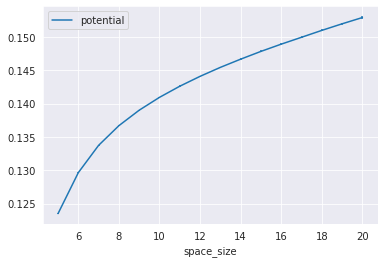

time_size = 5


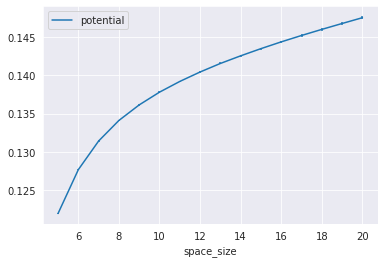

time_size = 6


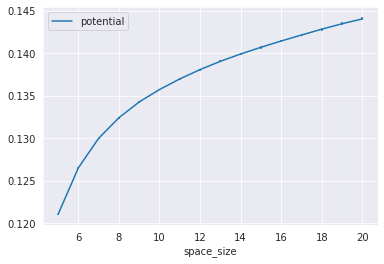

time_size = 7


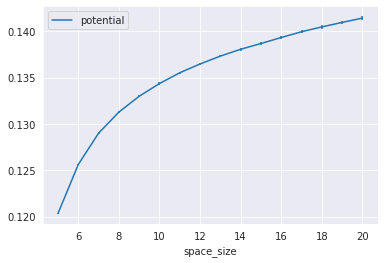

time_size = 8


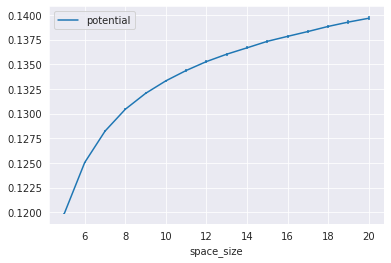

time_size = 9


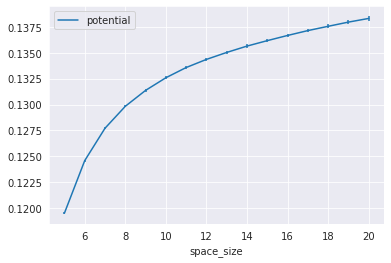

time_size = 10


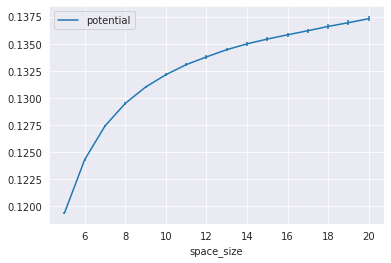

time_size = 11


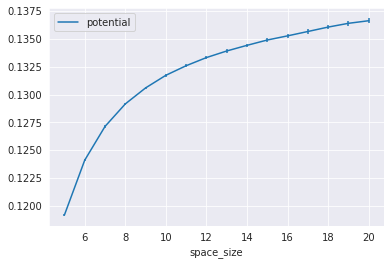

time_size = 12


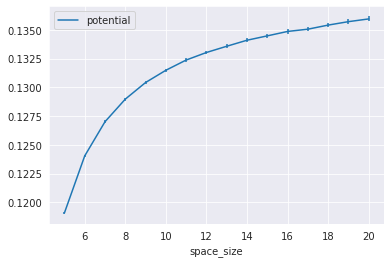

time_size = 13


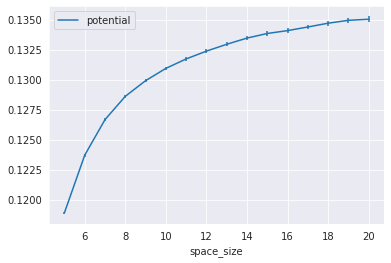

time_size = 14


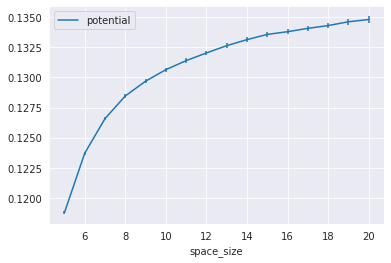

time_size = 15


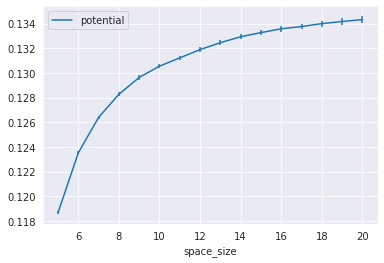

time_size = 16


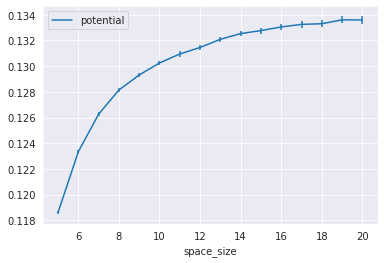

time_size = 17


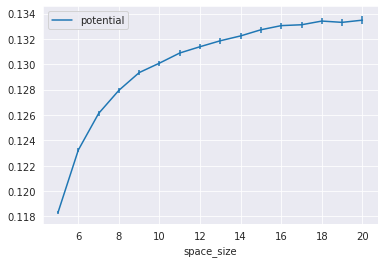

time_size = 18


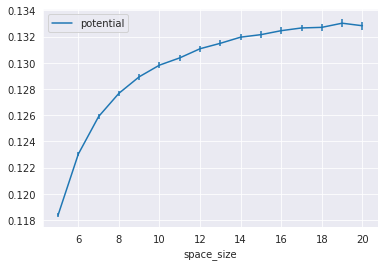

time_size = 19


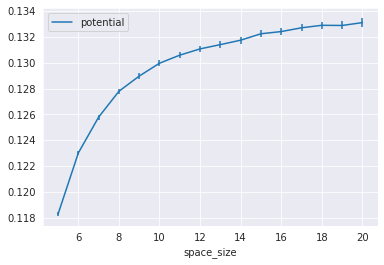

Empty DataFrame
Columns: []
Index: []

In [119]:
df_data_40_5 = pd.read_csv(f"../result/potential/on-axis/monopoless/qc2dstag/40^4/HYP2_APE/potential_mu=0.45.csv", index_col=None)
df_data_40_5.groupby(['time_size']).apply(plot_potential_df_space)

time_size = 4


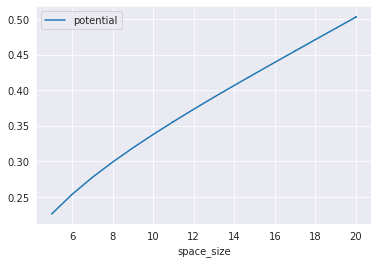

time_size = 5


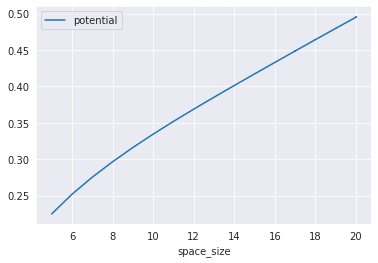

time_size = 6


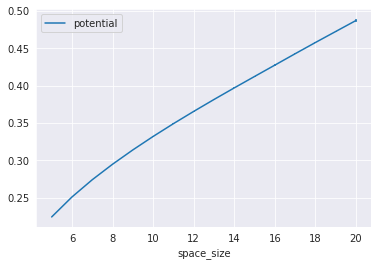

time_size = 7


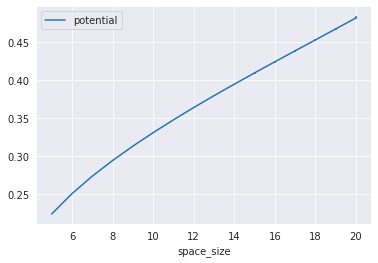

time_size = 8


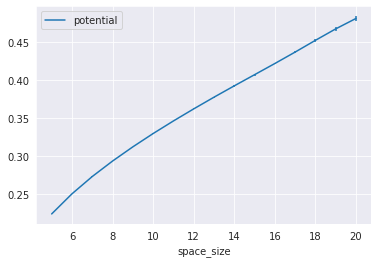

time_size = 9


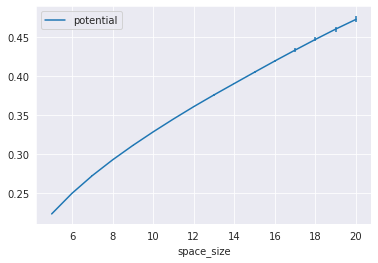

time_size = 10


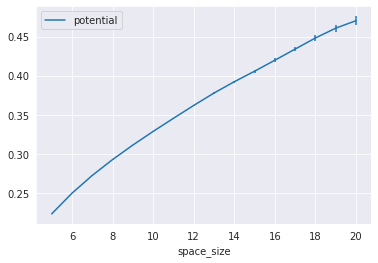

time_size = 11


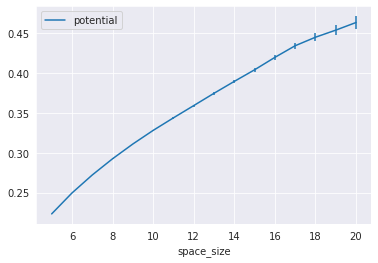

time_size = 12


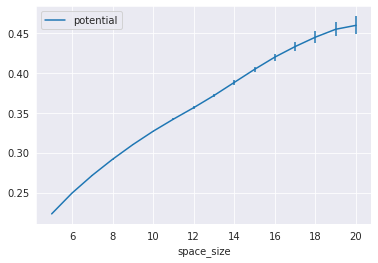

time_size = 13


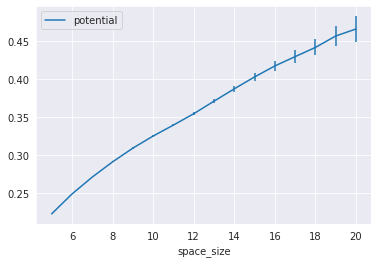

time_size = 14


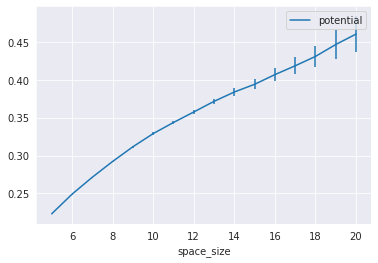

time_size = 15


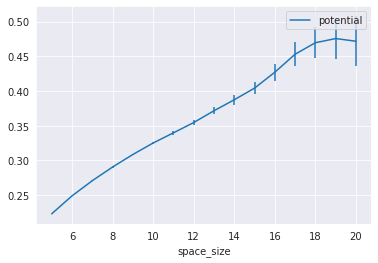

time_size = 16


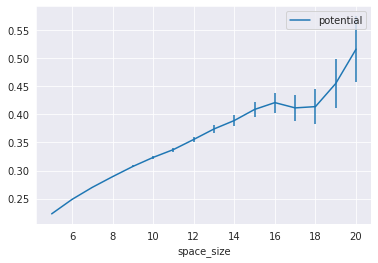

time_size = 17


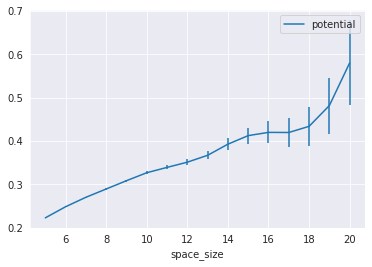

time_size = 18


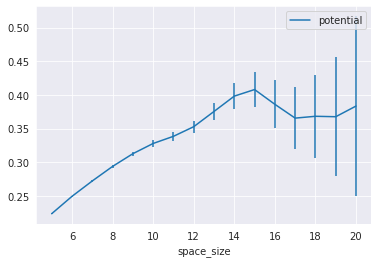

time_size = 19


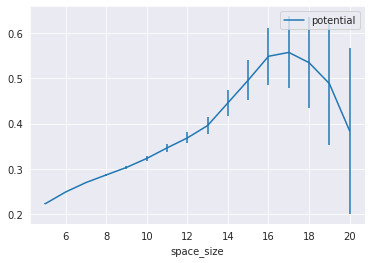

Empty DataFrame
Columns: []
Index: []

In [115]:
df_data_40_5 = pd.read_csv(f"../result/potential/on-axis/qc2dstag/40^4/HYP2_APE/potential_mu=0.05.csv", index_col=None)
df_data_40_5.groupby(['time_size']).apply(plot_potential_df_space)

time_size = 4


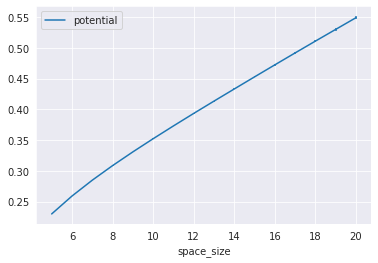

time_size = 5


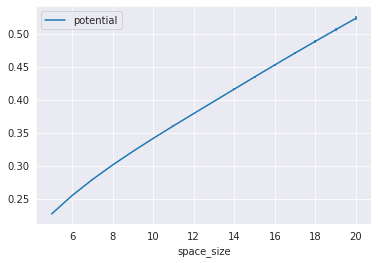

time_size = 6


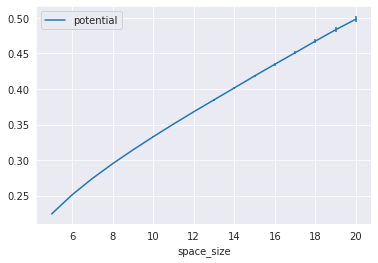

time_size = 7


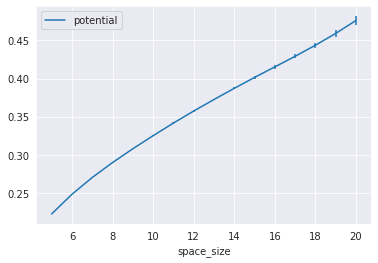

time_size = 8


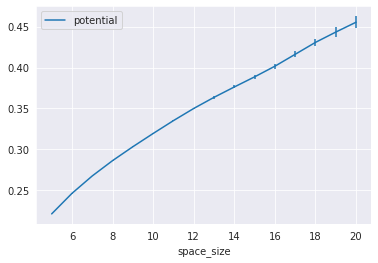

time_size = 9


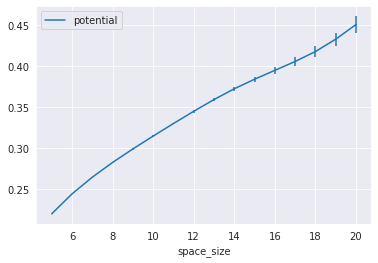

time_size = 10


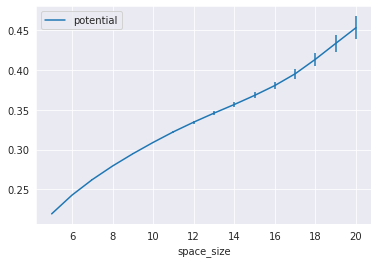

time_size = 11


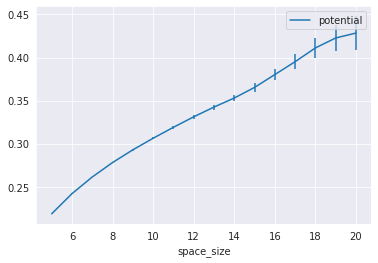

time_size = 12


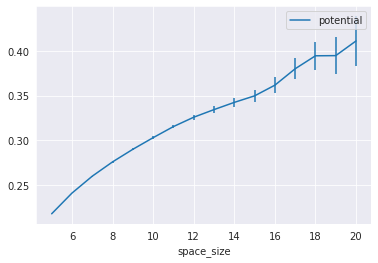

time_size = 13


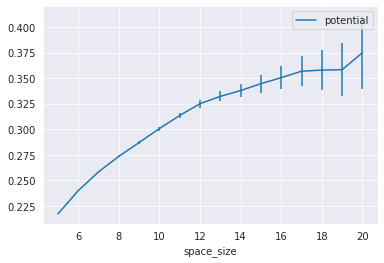

time_size = 14


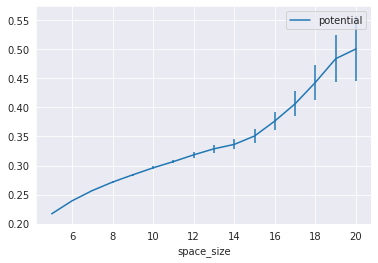

time_size = 15


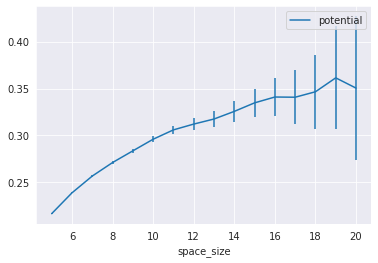

time_size = 16


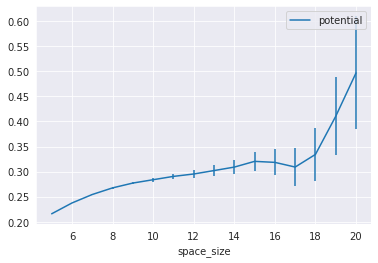

time_size = 17


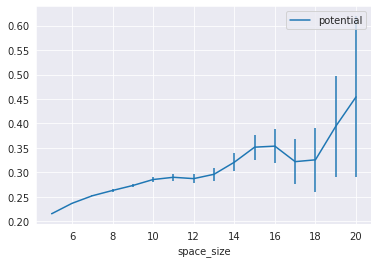

time_size = 18


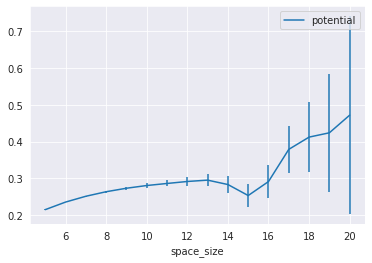

time_size = 19


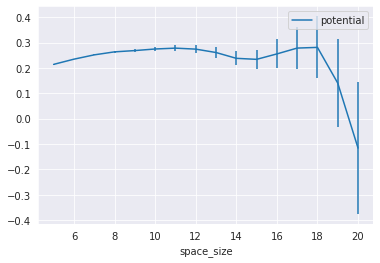

Empty DataFrame
Columns: []
Index: []

In [116]:
df_data_40_5 = pd.read_csv(f"../result/potential/on-axis/qc2dstag/40^4/HYP2_APE/potential_mu=0.35.csv", index_col=None)
df_data_40_5.groupby(['time_size']).apply(plot_potential_df_space)

T = 4


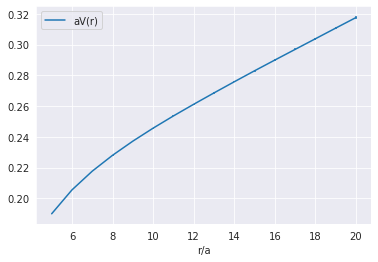

T = 5


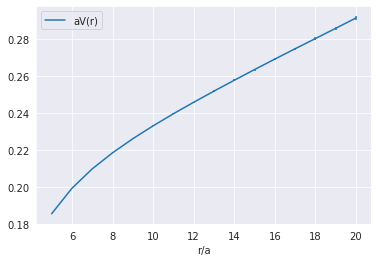

T = 6


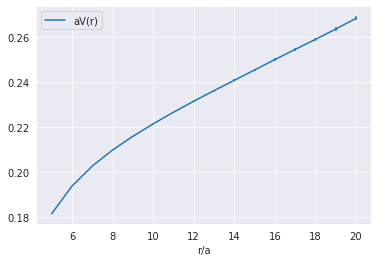

T = 7


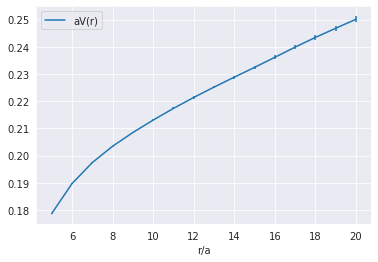

T = 8


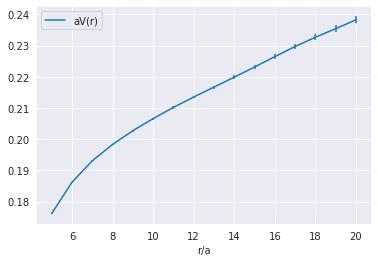

T = 9


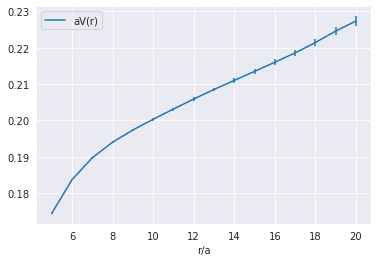

T = 10


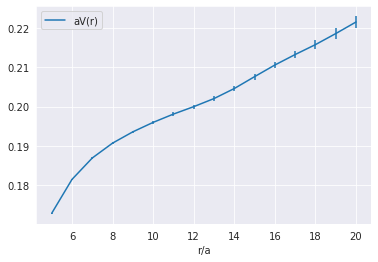

T = 11


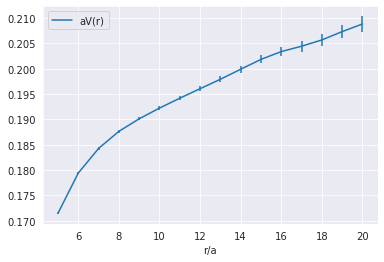

T = 12


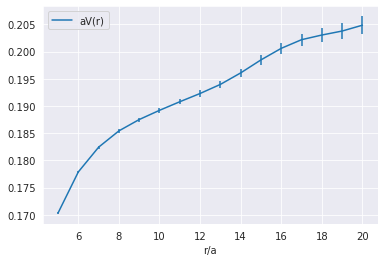

T = 13


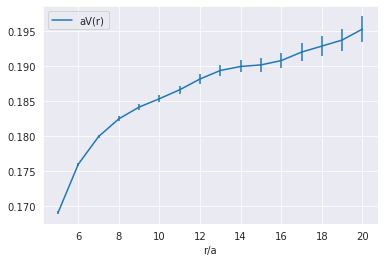

T = 14


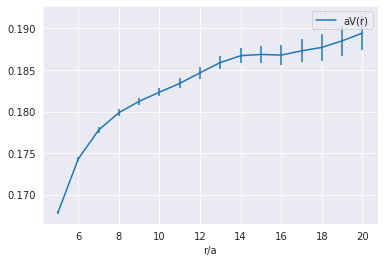

T = 15


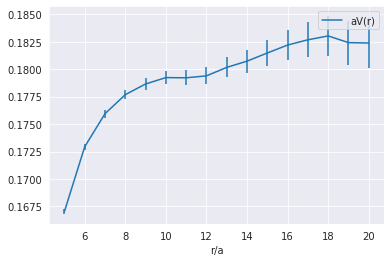

T = 16


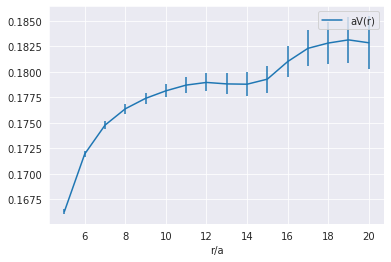

T = 17


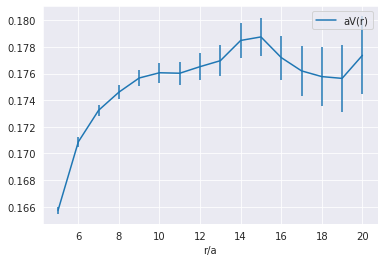

T = 18


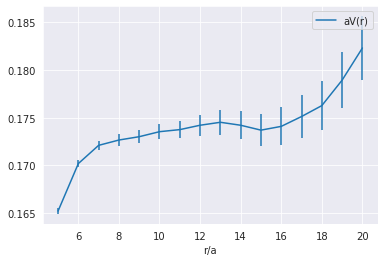

T = 19


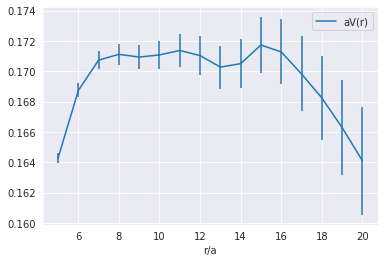

Empty DataFrame
Columns: []
Index: []

In [10]:
df_data_40_5 = pd.read_csv(f"../result/potential/on-axis/qc2dstag/40^4/HYP2_APE/potential_mu=0.45.csv", index_col=None)
df_data_40_5.groupby(['T']).apply(plot_potential_df_space)

T = 4


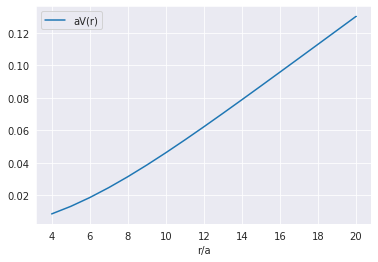

T = 5


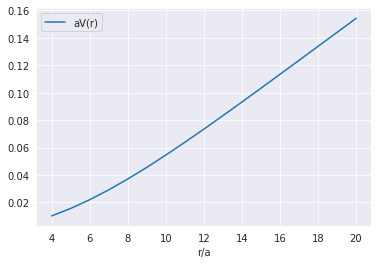

T = 6


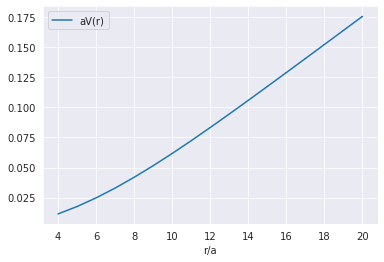

T = 7


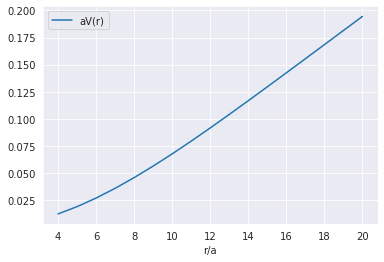

T = 8


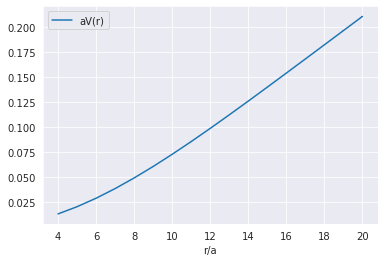

T = 9


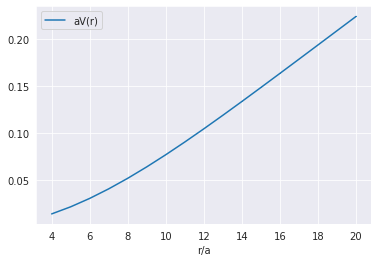

T = 10


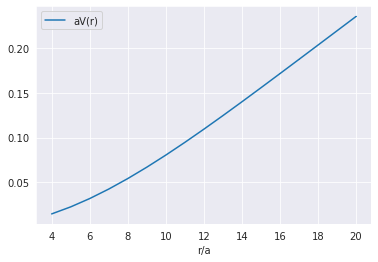

T = 11


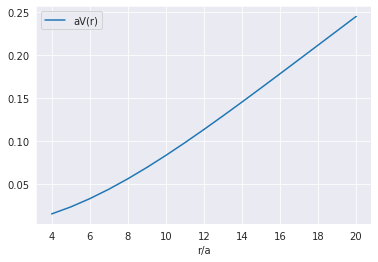

T = 12


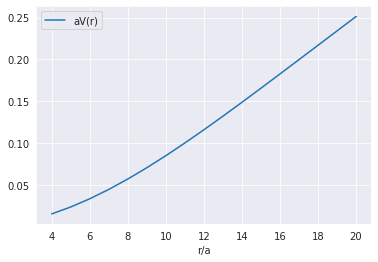

T = 13


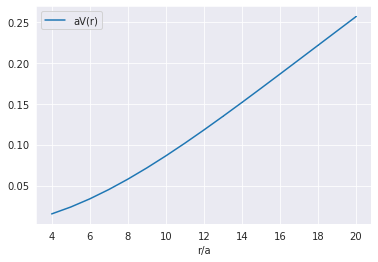

T = 14


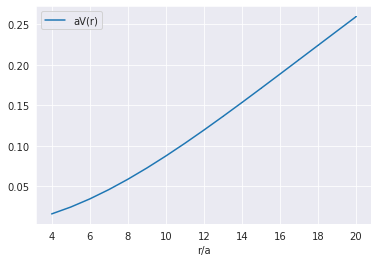

T = 15


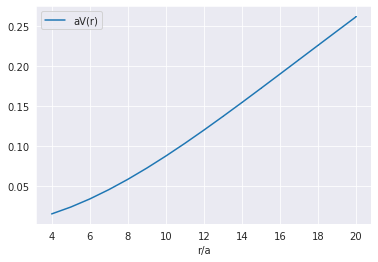

T = 16


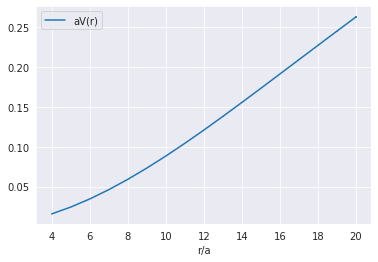

T = 17


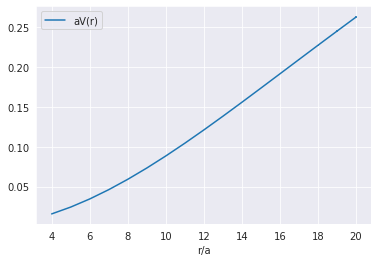

T = 18


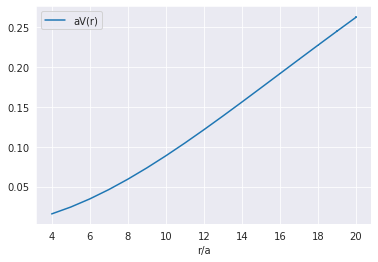

T = 19


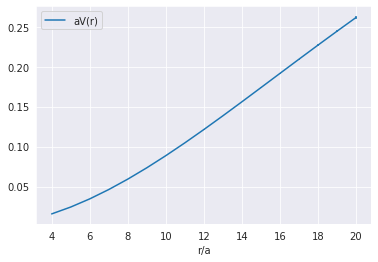

Empty DataFrame
Columns: []
Index: []

In [12]:
df_data_40_5 = pd.read_csv(f"../result/potential_spatial/qc2dstag/40^4/potential_spatial_mu=0.05.csv", index_col=None)
df_data_40_5.groupby(['T']).apply(plot_potential_df_space)

In [23]:
def plot_potentials_together(mu, lattice_size, smearing):
    data = []
    data.append(pd.read_csv(f"../result/potential/on-axis/qc2dstag/{lattice_size}/{smearing}/potential_mu={mu}.csv", index_col=None))
    data[-1]["type"] = "full"
    data.append(pd.read_csv(f"../result/potential/on-axis/monopole/qc2dstag/{lattice_size}/unsmeared/potential_mu={mu}.csv", index_col=None))
    data[-1]["type"] = "monopole"
    data.append(pd.read_csv(f"../result/potential/on-axis/monopoless/qc2dstag/{lattice_size}/{smearing}/potential_mu={mu}.csv", index_col=None))
    data[-1]["type"] = "monopoless"
    data.append(pd.read_csv(f"../result/potential/on-axis/monopole/qc2dstag/{lattice_size}/unsmeared/potential_mu={mu}.csv", index_col=None))
    data[-1]["type"] = "sum"

    data[3][['aV(r)', 'err']] = data[3][['aV(r)', 'err']] + data[2][['aV(r)', 'err']]

    df = pd.concat(data)

    # is_integer = []
    # for i in df['space_size']:
    #     is_integer.append(i.is_integer())
    # df = df[is_integer]

    image_path = f"../images/potential/on-axis/qc2dstag/{lattice_size}/{smearing}/mu{mu}"
    image_name = f"potential"
    df.groupby(['T']).apply(plot_potential_df_space_several, image_path, image_name)

T = 4


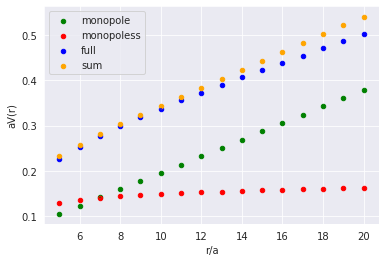

T = 5


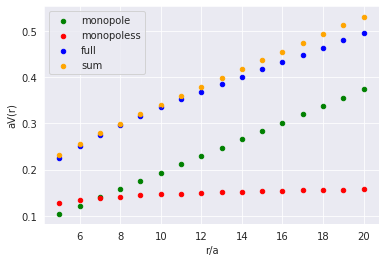

T = 6


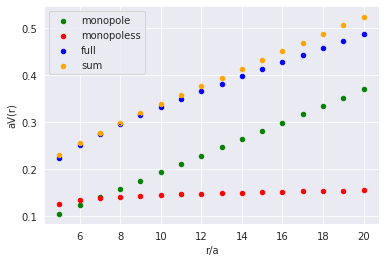

T = 7


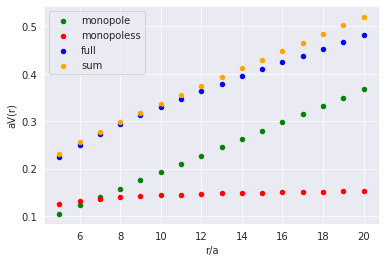

T = 8


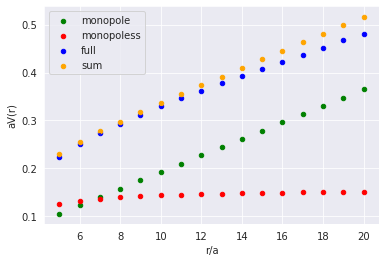

T = 9


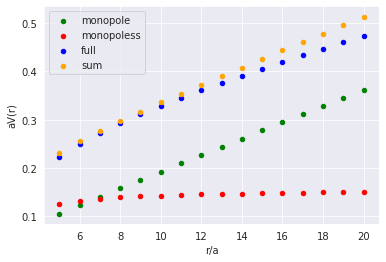

T = 10


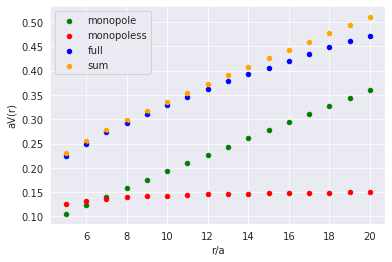

T = 11


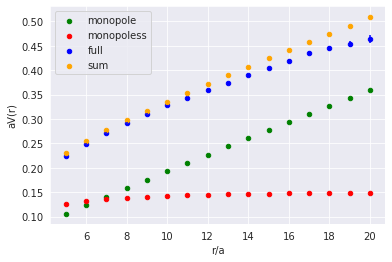

T = 12


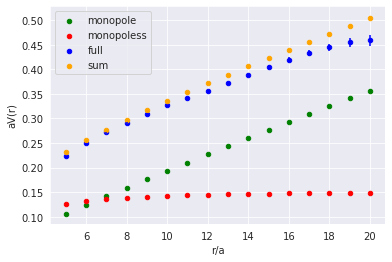

T = 13


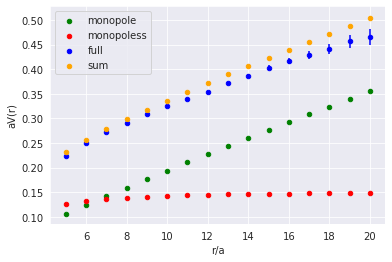

T = 14


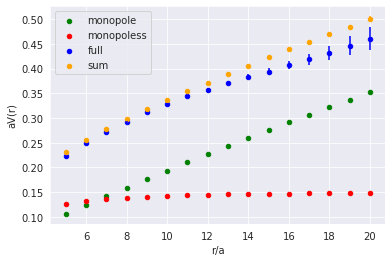

T = 15


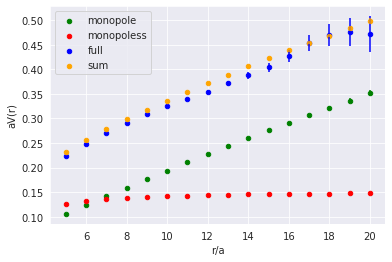

T = 16


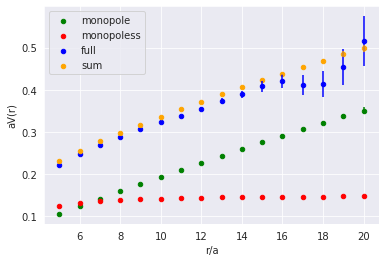

T = 17


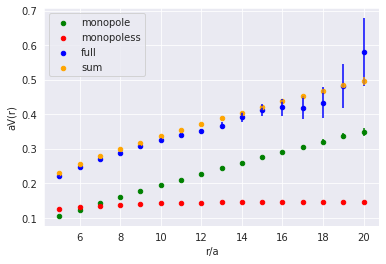

T = 18


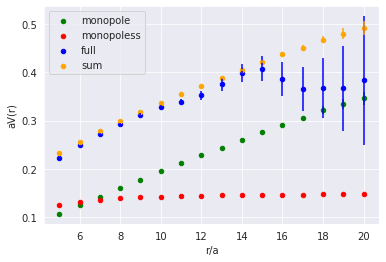

T = 19


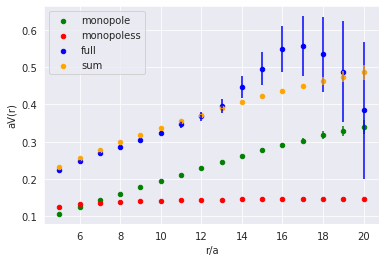

In [24]:
plot_potentials_together('0.05', '40^4', 'HYP2_APE')

T = 4


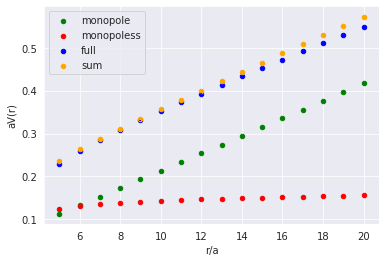

T = 5


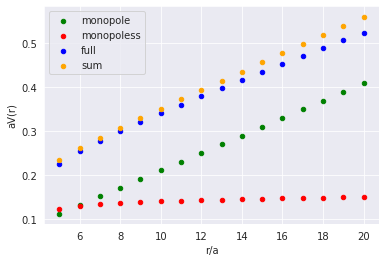

T = 6


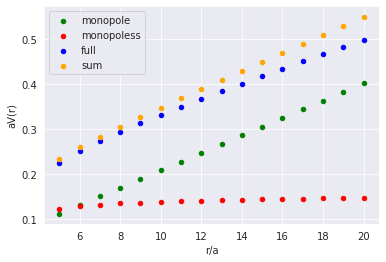

T = 7


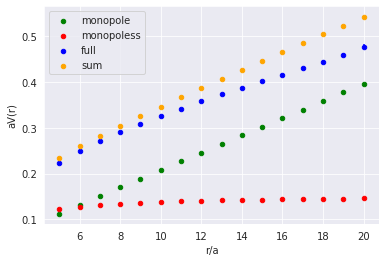

T = 8


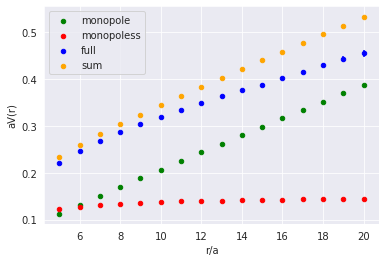

T = 9


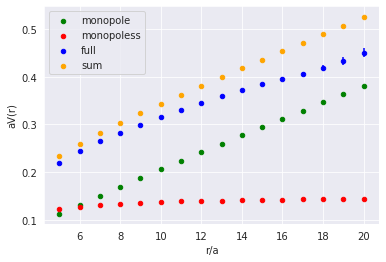

T = 10


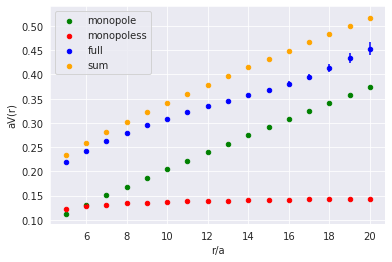

T = 11


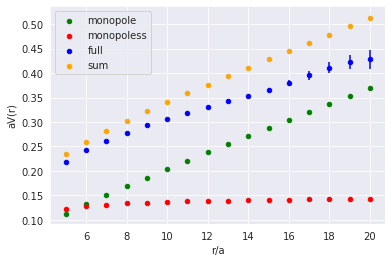

T = 12


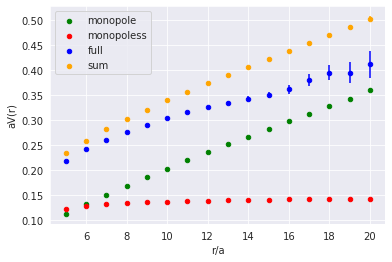

T = 13


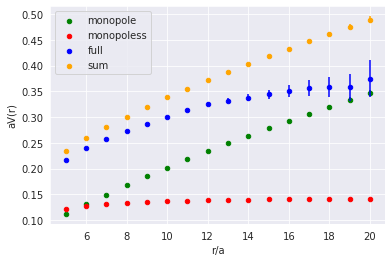

T = 14


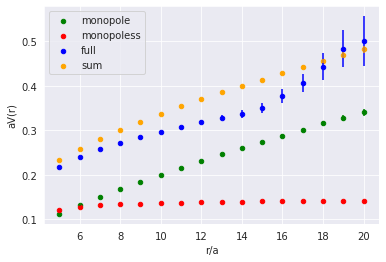

T = 15


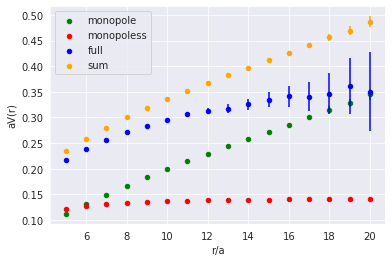

T = 16


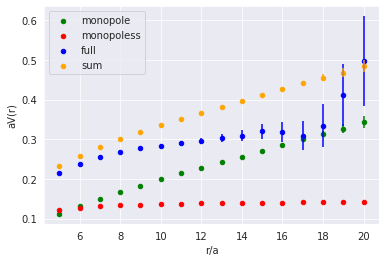

T = 17


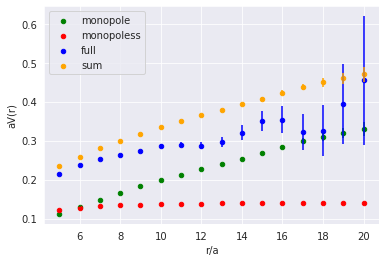

T = 18


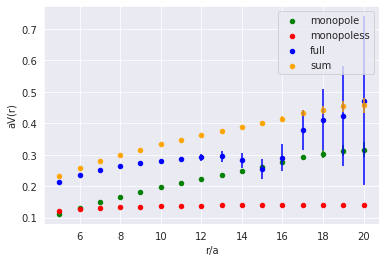

T = 19


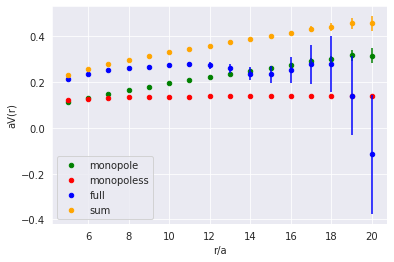

In [25]:
plot_potentials_together('0.35', '40^4', 'HYP2_APE')

T = 4


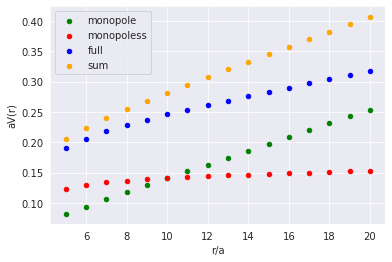

T = 5


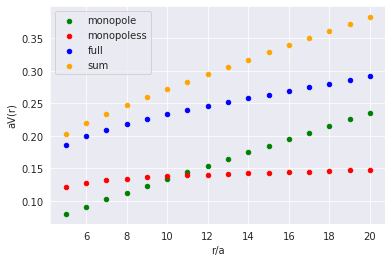

T = 6


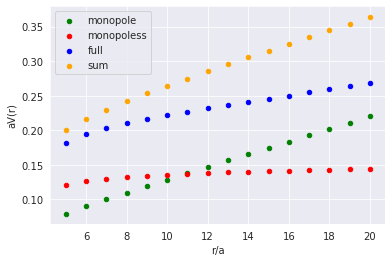

T = 7


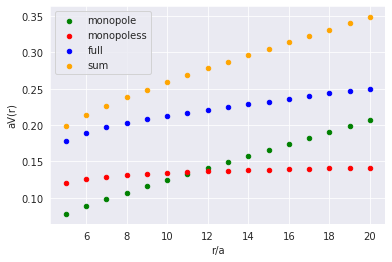

T = 8


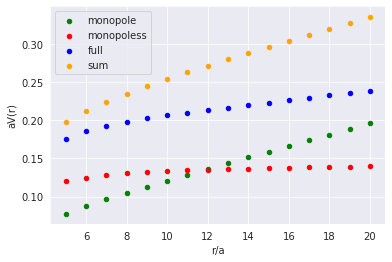

T = 9


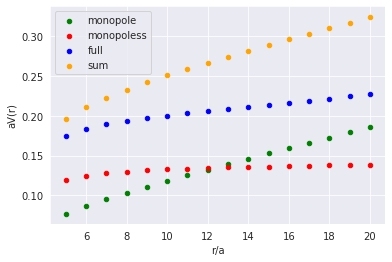

T = 10


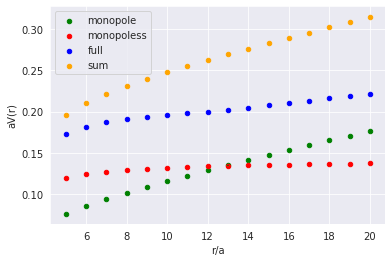

T = 11


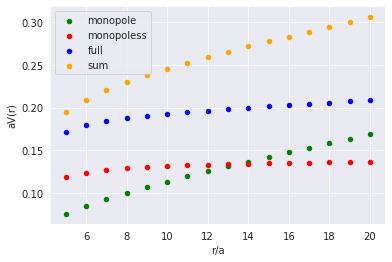

T = 12


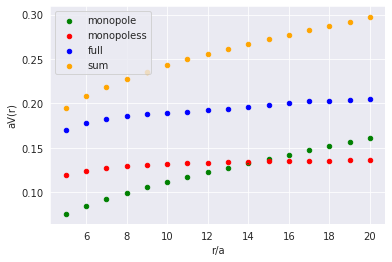

T = 13


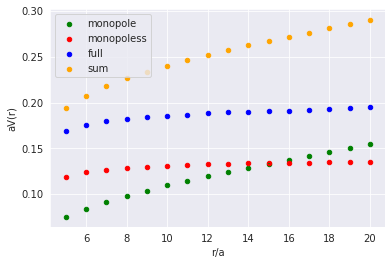

T = 14


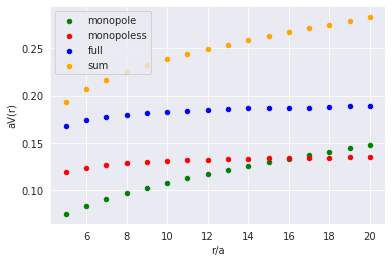

T = 15


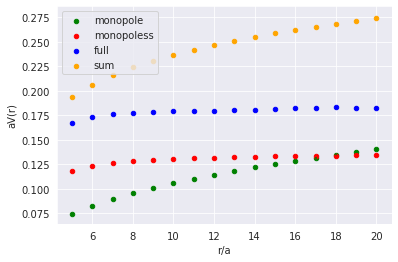

T = 16


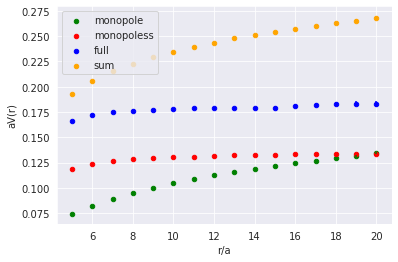

T = 17


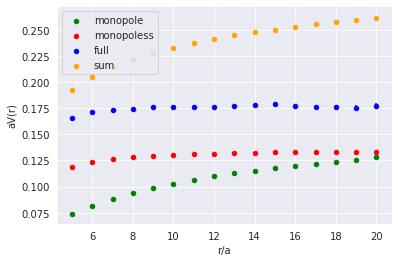

T = 18


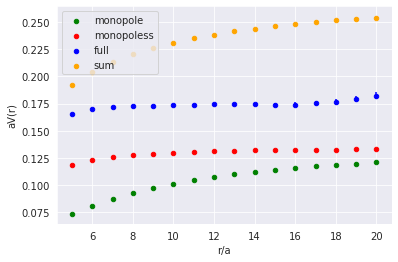

T = 19


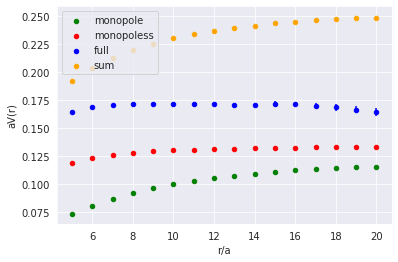

In [26]:
plot_potentials_together('0.45', '40^4', 'HYP2_APE')

T = 4


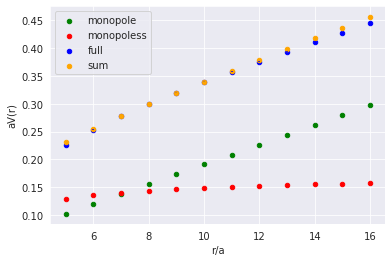

T = 5


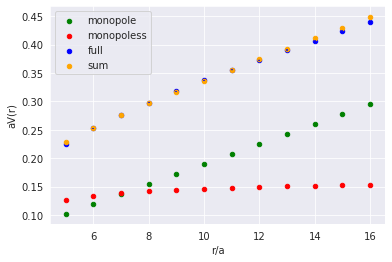

T = 6


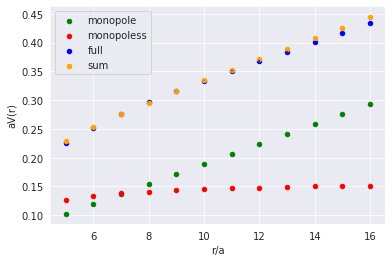

T = 7


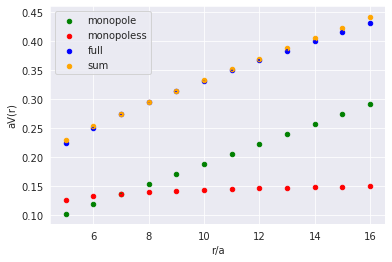

T = 8


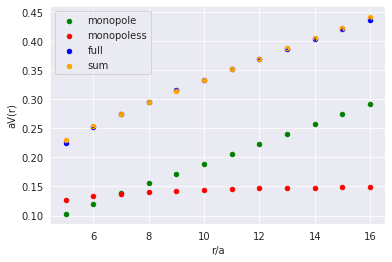

T = 9


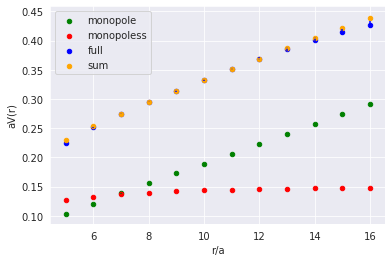

T = 10


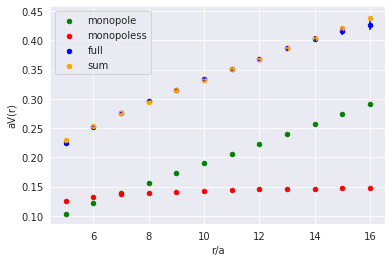

T = 11


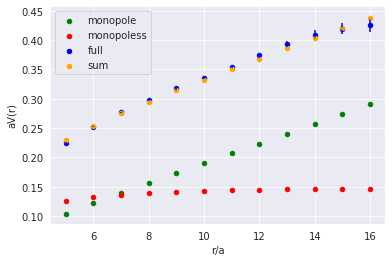

T = 12


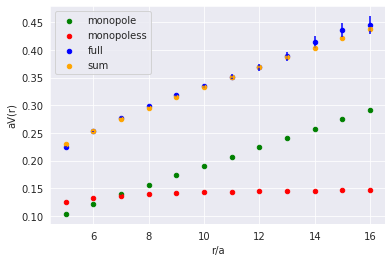

T = 13


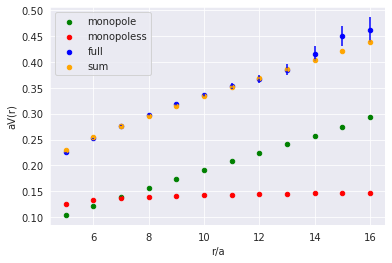

T = 14


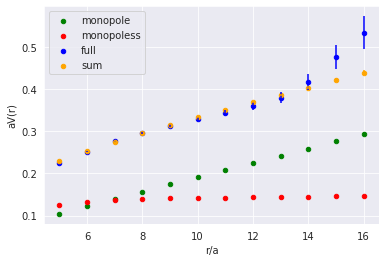

T = 15


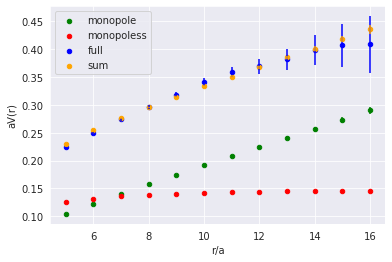

In [162]:
plot_potentials_together('0.00', '32^4', 'HYP2_APE')

In [20]:
def plot_time_dependence(mu, monopole, smearing, lattice_size):
    df_data_40_5 = pd.read_csv(f"../result/potential/on-axis/{monopole}/qc2dstag/{lattice_size}/{smearing}/potential_mu=0.{mu}.csv", index_col=None)
    
    time_sizes = [6, 8, 10, 12, 14]
    
    df1 = df_data_40_5[df_data_40_5['T'].isin(time_sizes)]
    fg = seaborn.FacetGrid(data=df1, hue='T',  aspect=1.61)
    fg.map(plt.errorbar, 'r/a', 'aV(r)', 'err', marker="o", fmt='', linestyle = '').add_legend()
    
    image_path = f'../images/potential/on-axis/qc2dstag/{lattice_size}/{smearing}'
    try:
        os.makedirs(image_path)
    except:
        pass
    
    image_path = f'{image_path}/potential_{monopole}_mu=0p{mu}_time_dependence'
    fg.savefig(image_path)
    
def plot_time_dependence_space(mu, monopole, smearing, lattice_size):
    df_data_40_5 = pd.read_csv(f"../result/potential_spatial/{monopole}/qc2dstag/{lattice_size}/potential_spatial_mu=0.{mu}.csv", index_col=None)
    
    time_sizes = [6, 8, 10, 12, 14, 16, 18, 20]
    
    df1 = df_data_40_5[df_data_40_5['T'].isin(time_sizes)]
    fg = seaborn.FacetGrid(data=df1, hue='T',  aspect=1.61)
    fg.map(plt.errorbar, 'r/a', 'aV(r)', 'err', marker="o", fmt='', linestyle = '').add_legend()
    
    image_path = f'../images/potential_spatial/qc2dstag/{lattice_size}'
    try:
        os.makedirs(image_path)
    except:
        pass
    
    image_path = f'{image_path}/potential_space_{monopole}_mu=0p{mu}_time_dependence'
    fg.savefig(image_path)

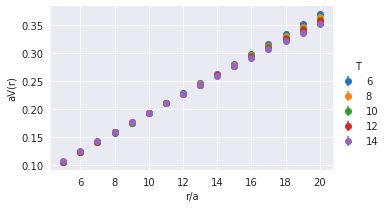

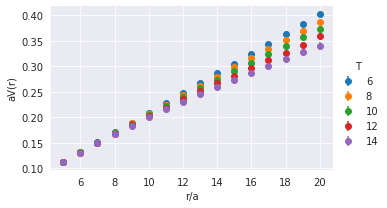

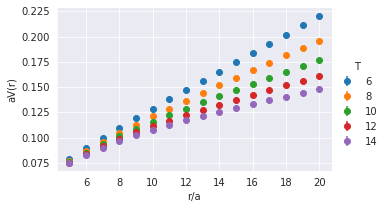

In [163]:
plot_time_dependence('05', 'monopole', 'unsmeared', '40^4')
plot_time_dependence('35', 'monopole', 'unsmeared', '40^4')
plot_time_dependence('45', 'monopole', 'unsmeared', '40^4')

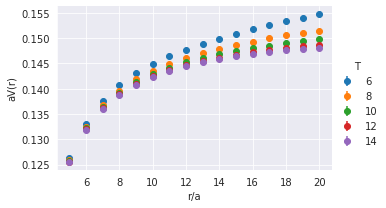

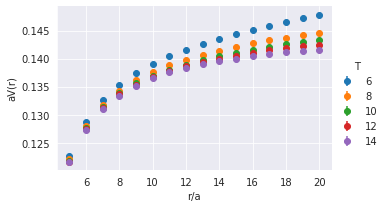

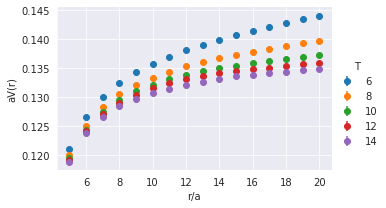

In [164]:
plot_time_dependence('05', 'monopoless', 'HYP2_APE', '40^4')
plot_time_dependence('35', 'monopoless', 'HYP2_APE', '40^4')
plot_time_dependence('45', 'monopoless', 'HYP2_APE', '40^4')

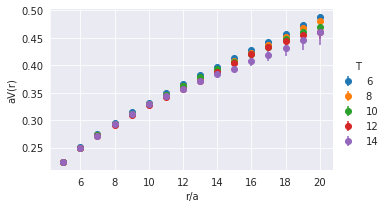

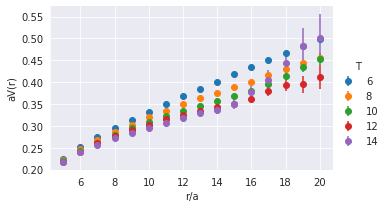

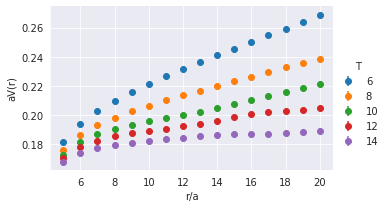

In [165]:
plot_time_dependence('05', '', 'HYP2_APE', '40^4')
plot_time_dependence('35', '', 'HYP2_APE', '40^4')
plot_time_dependence('45', '', 'HYP2_APE', '40^4')

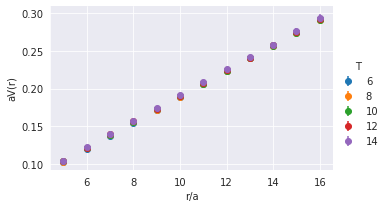

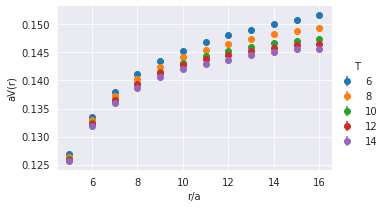

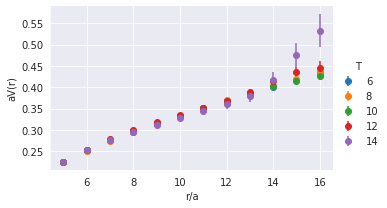

In [166]:
plot_time_dependence('00', 'monopole', 'unsmeared', '32^4')
plot_time_dependence('00', 'monopoless', 'HYP2_APE', '32^4')
plot_time_dependence('00', '', 'HYP2_APE', '32^4')

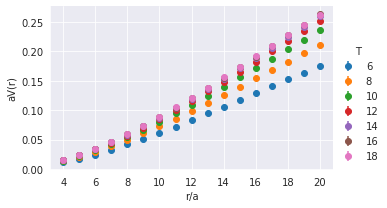

In [21]:
plot_time_dependence_space('05', '', '', '40^4')